In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
%matplotlib inline 

from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage.color import rgb2gray
from scipy.spatial.distance import squareform
from scipy.misc import imread
from transparent_imshow import transp_imshow
import matplotlib.cm as cm
from scipy import ndimage, misc

import sys
sys.path.append("..")


In [2]:
from src.merge_dfs import merge

In [3]:
all_files = glob.glob('../data/classification/*')

In [4]:
int(all_files[1].split('/')[3].split('_')[0])

425

In [5]:
whitespace_dict = {164: 200.2, 202: 200.5, 425: 208., 345: 237.4, 72: 216.2, 363: 247.7, 509: 207.9, 257: 201.2, 203: 250.8, 183: 252.4}
files_by_img_dict = {k: [] for k in whitespace_dict.keys()}

In [6]:
files_by_img_dict

{164: [],
 202: [],
 425: [],
 345: [],
 72: [],
 363: [],
 509: [],
 257: [],
 203: [],
 183: []}

In [7]:
for file in all_files:
    file_key = int(file.split('/')[3].split('_')[0])
    files_by_img_dict[file_key].append(file)

ValueError: invalid literal for int() with base 10: 'result.csv'

In [8]:
files_by_img_dict

{164: ['../data/classification/164_img_239.csv',
  '../data/classification/164_img_95.csv'],
 202: ['../data/classification/202_img_103.csv',
  '../data/classification/202_img_370.csv',
  '../data/classification/202_img_405.csv'],
 425: ['../data/classification/425_img_119.csv',
  '../data/classification/425_img_120.csv',
  '../data/classification/425_img_350.csv'],
 345: ['../data/classification/345_img_293.csv',
  '../data/classification/345_img_292.csv',
  '../data/classification/345_img_337.csv',
  '../data/classification/345_img_382.csv',
  '../data/classification/345_img_410.csv'],
 72: ['../data/classification/72_img_392.csv',
  '../data/classification/72_img_164.csv'],
 363: ['../data/classification/363_img_416.csv',
  '../data/classification/363_img_300.csv'],
 509: ['../data/classification/509_img_397.csv',
  '../data/classification/509_img_145.csv',
  '../data/classification/509_img_190.csv',
  '../data/classification/509_img_393.csv'],
 257: ['../data/classification/257_img

In [12]:
df_164 = merge(files_by_img_dict[164])
df_202 = merge(files_by_img_dict[202])
df_425 = merge(files_by_img_dict[425])
df_345 = merge(files_by_img_dict[345])
df_72 = merge(files_by_img_dict[72])
df_363 = merge(files_by_img_dict[363])
df_509 = merge(files_by_img_dict[509])
df_257 = merge(files_by_img_dict[257])
# df_203 = merge(files_by_img_dict[203])
df_183 = merge(files_by_img_dict[183])
whitespace_dict = {164: 200.2, 202: 200.5, 425: 208., 345: 237.4, 72: 216.2, 363: 247.7, 509: 207.9, 257: 201.2, 203: 250.8, 183: 252.4}
df_dict = {164: [df_164, 200.2], 202: [df_202, 200.5], 425: [df_425, 208.], 345: [df_345, 237.4], 72: [df_72, 216.2], 363: [df_363, 247.7], 509: [df_509, 207.9], 257: [df_257, 201.2], 183: [df_183, 252.4]}

In [25]:
df_345.describe()

,gray_pixel_value,mean_gray_pixel_value,bin_percentage_colored,sobel_gradient,label,label_t1,label_t2,label_t3,normalized_pixel_value,normalized_mean_pixel_value
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,173.906706,198.716821,0.445236,-3.072886,0.389213,0.381924,0.374636,0.367347,0.267453,0.162945
std,40.833828,27.842351,0.294236,47.978014,0.487928,0.501000,0.513637,0.525869,0.172004,0.117280
min,67.000000,141.030000,0.016667,-153.392857,0.000000,-1.000000,-1.000000,-1.000000,0.081719,0.002293
25%,143.000000,173.815556,0.193056,-27.955357,0.000000,0.000000,0.000000,0.000000,0.119629,0.058987
50%,191.000000,200.203333,0.443333,2.714286,0.000000,0.000000,0.000000,0.000000,0.195451,0.156684
75%,209.000000,223.396389,0.692222,14.285714,1.000000,1.000000,1.000000,1.000000,0.397641,0.267837
max,218.000000,236.855556,0.974444,132.625000,1.000000,1.000000,1.000000,1.000000,0.717776,0.405939


In [13]:
def add_pixel_difference(df, pixel):
    df['normalized_pixel_value'] = df.gray_pixel_value.apply(lambda x: (pixel - x)/pixel)
    df['normalized_mean_pixel_value'] = df.mean_gray_pixel_value.apply(lambda x: (pixel - x)/pixel)

In [14]:
for key, item in df_dict.items():
    add_pixel_difference(item[0], item[1])

In [15]:
result_df_list = []
for key in df_dict.keys():
    df = df_dict[key][0]
    result_df_list.append(df)

In [16]:
result = pd.concat(result_df_list, axis=0, ignore_index=True)

In [17]:
lines = result[result.label == 1]
drawings = result[result.label == 0]

In [20]:
lines

,gray_pixel_value,mean_gray_pixel_value,bin_percentage_colored,sobel_gradient,label,label_t1,label_t2,label_t3,normalized_pixel_value,normalized_mean_pixel_value
0,199.0,218.904444,0.025556,0.107143,1,-1.0,-1.0,-1.0,0.005994,-0.093429
1,196.0,213.333333,0.031111,0.107143,1,1.0,-1.0,-1.0,0.020979,-0.065601
2,194.0,207.853333,0.037778,0.107143,1,1.0,1.0,-1.0,0.030969,-0.038228
3,198.0,204.863333,0.063333,0.107143,1,1.0,1.0,1.0,0.010989,-0.023293
4,199.0,201.814444,0.116667,0.107143,1,1.0,1.0,1.0,0.005994,-0.008064
...,...,...,...,...,...,...,...,...,...,...
5539,211.0,249.341111,0.040000,3.035714,1,1.0,1.0,1.0,0.164025,0.012119
5540,212.0,249.505556,0.037778,3.125000,1,1.0,1.0,1.0,0.160063,0.011468
5541,212.0,249.658889,0.035556,3.196429,1,1.0,1.0,1.0,0.160063,0.010860
5542,214.0,249.807778,0.033333,3.357143,1,1.0,1.0,1.0,0.152139,0.010270


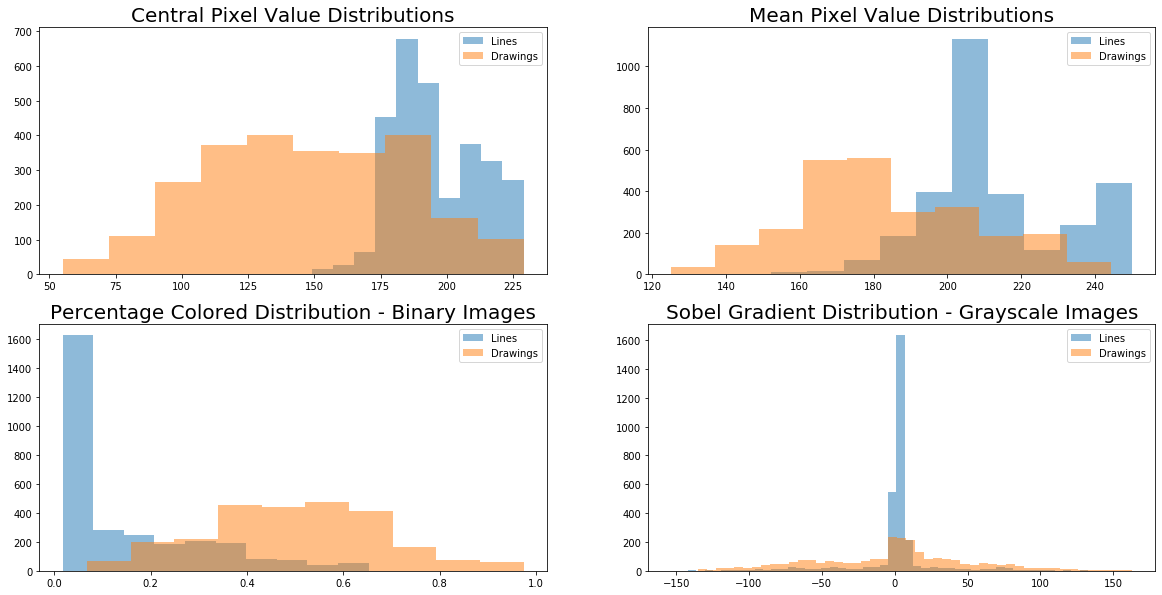

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].hist(lines.gray_pixel_value, alpha=0.5, label = 'Lines')
ax[0][0].hist(drawings.gray_pixel_value, alpha=0.5, label = 'Drawings')
ax[0][0].set_title('Central Pixel Value Distributions', fontsize=20)
ax[0][0].legend()
ax[0][1].hist(lines.mean_gray_pixel_value, alpha=0.5, label = 'Lines')
ax[0][1].hist(drawings.mean_gray_pixel_value, alpha=0.5, label = 'Drawings')
ax[0][1].set_title('Mean Pixel Value Distributions', fontsize=20)
ax[0][1].legend()
ax[1][0].hist(lines.bin_percentage_colored, alpha=0.5, label = 'Lines')
ax[1][0].hist(drawings.bin_percentage_colored, alpha=0.5, label = 'Drawings')
ax[1][0].set_title('Percentage Colored Distribution - Binary Images', fontsize=20)
ax[1][0].legend()
ax[1][1].hist(lines.sobel_gradient, alpha=0.5, label = 'Lines', bins = 50)
ax[1][1].hist(drawings.sobel_gradient, alpha=0.5, label = 'Drawings', bins = 50)
ax[1][1].set_title('Sobel Gradient Distribution - Grayscale Images', fontsize=20)
ax[1][1].legend()


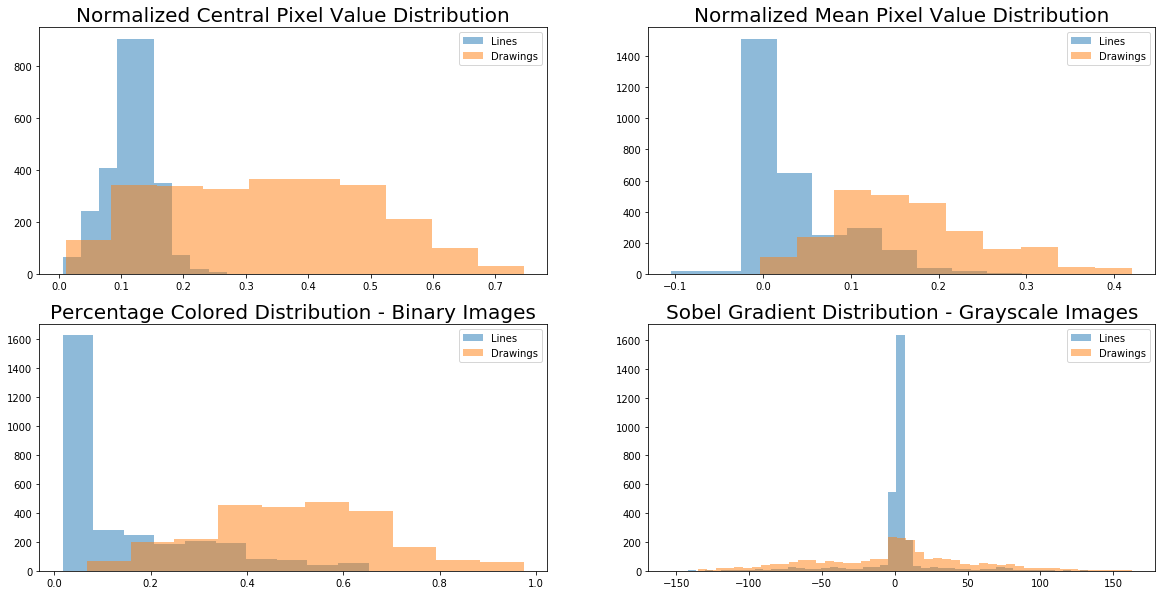

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].hist(lines.normalized_pixel_value, alpha=0.5, label = 'Lines')
ax[0][0].hist(drawings.normalized_pixel_value, alpha=0.5, label = 'Drawings')
ax[0][0].set_title('Normalized Central Pixel Value Distribution', fontsize=20)
ax[0][0].legend()
ax[0][1].hist(lines.normalized_mean_pixel_value, alpha=0.5, label = 'Lines')
ax[0][1].hist(drawings.normalized_mean_pixel_value, alpha=0.5, label = 'Drawings')
ax[0][1].set_title('Normalized Mean Pixel Value Distribution', fontsize=20)
ax[0][1].legend()
ax[1][0].hist(lines.bin_percentage_colored, alpha=0.5, label = 'Lines')
ax[1][0].hist(drawings.bin_percentage_colored, alpha=0.5, label = 'Drawings')
ax[1][0].set_title('Percentage Colored Distribution - Binary Images', fontsize=20)
ax[1][0].legend()
ax[1][1].hist(lines.sobel_gradient, alpha=0.5, label = 'Lines', bins = 50)
ax[1][1].hist(drawings.sobel_gradient, alpha=0.5, label = 'Drawings', bins = 50)
ax[1][1].set_title('Sobel Gradient Distribution - Grayscale Images', fontsize=20)
ax[1][1].legend()


In [22]:
result.to_csv('../data/classification/result.csv', columns = result.columns)

In [23]:
result

,gray_pixel_value,mean_gray_pixel_value,bin_percentage_colored,sobel_gradient,label,label_t1,label_t2,label_t3,normalized_pixel_value,normalized_mean_pixel_value
0,199.0,218.904444,0.025556,0.107143,1,-1.0,-1.0,-1.0,0.005994,-0.093429
1,196.0,213.333333,0.031111,0.107143,1,1.0,-1.0,-1.0,0.020979,-0.065601
2,194.0,207.853333,0.037778,0.107143,1,1.0,1.0,-1.0,0.030969,-0.038228
3,198.0,204.863333,0.063333,0.107143,1,1.0,1.0,1.0,0.010989,-0.023293
4,199.0,201.814444,0.116667,0.107143,1,1.0,1.0,1.0,0.005994,-0.008064
...,...,...,...,...,...,...,...,...,...,...
5539,211.0,249.341111,0.040000,3.035714,1,1.0,1.0,1.0,0.164025,0.012119
5540,212.0,249.505556,0.037778,3.125000,1,1.0,1.0,1.0,0.160063,0.011468
5541,212.0,249.658889,0.035556,3.196429,1,1.0,1.0,1.0,0.160063,0.010860
5542,214.0,249.807778,0.033333,3.357143,1,1.0,1.0,1.0,0.152139,0.010270
